<a href="https://colab.research.google.com/github/TonmoyTalukder/deep-learning-explore/blob/main/PyTorch_Explore/4_Feed_Forward_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# MNIST
# Dtaloader, Transformation
# Multilayer Neural Net, Activation Function
# Loss and Optimizer
# Training Loop (batch traning)
# Model Evaluation
# GPU Support
```



In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=False,
                                           transform=transforms.ToTensor())

In [2]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


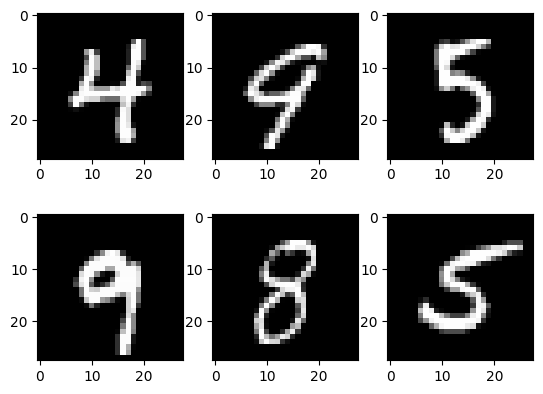

In [3]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [4]:
# Multi Layer Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        # self.leaky_relu = nn.LeakyReLU()
        # self.tanh = nn.Tanh()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        # out = self.leaky_relu(out)
        # out = self.tanh(out)
        out = self.l2(out)
        # No Softmax, because we will use CrossEntropy later which include Softmax
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [5]:
# training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # reshape image
                # 100, 1, 28, 28
                # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.6224
Epoch [1/2], Step [200/600], Loss: 0.4399
Epoch [1/2], Step [300/600], Loss: 0.3373
Epoch [1/2], Step [400/600], Loss: 0.2802
Epoch [1/2], Step [500/600], Loss: 0.2635
Epoch [1/2], Step [600/600], Loss: 0.1538
Epoch [2/2], Step [100/600], Loss: 0.2699
Epoch [2/2], Step [200/600], Loss: 0.3243
Epoch [2/2], Step [300/600], Loss: 0.1939
Epoch [2/2], Step [400/600], Loss: 0.2458
Epoch [2/2], Step [500/600], Loss: 0.1692
Epoch [2/2], Step [600/600], Loss: 0.1184


In [6]:
# test
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc} %')

accuracy = 95.16 %
